# Introduction
In this notebook, we'll dive into a critical medical issue: heart attacks, also known as myocardial infarctions. When a part of the heart muscle doesn't receive an adequate blood supply, it can lead to a heart attack. The longer this condition persists without proper treatment, the more severe the damage to the heart muscle becomes.

Coronary artery disease (CAD) stands as the primary culprit behind most heart attacks. This disease occurs when the arteries that supply blood to the heart become narrowed or blocked due to the buildup of plaque. With millions of lives affected by heart attacks annually, it's imperative to explore predictive models that can assist in identifying individuals at risk.

Our dataset comprises crucial medical information about patients, enabling us to assess the likelihood of a heart attack occurrence. By leveraging various machine learning algorithms such as Logistic Regression (LR), Support Vector Machines (SVM), k-Nearest Neighbors (KNN), and Decision Trees (DT), our goal is to develop a robust predictive model. Through this exploration, we aim to determine which algorithm best suits our dataset, ultimately contributing to the ongoing efforts in cardiovascular health prediction.

# Data Dictionary
1. **Age**: Age of the patient
2. **Sex**: Sex of the patient
3. **cp**: Chest Pain type chest pain type
 * Value 1: typical angina
 * Value 2: atypical angina
 * Value 3: non-anginal pain
 * Value 4: asymptomatic
4. **trtbps**: resting blood pressure (in mm Hg)
5. **chol**: cholestoral in mg/dl fetched via BMI sensor
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
 * Value 0: normal
 * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalachh**: maximum heart rate achieved
9. **oldpeak**: previous peak
10. **slp**: slope
11. **caa**: Number of major vessels
12. **thall**: Thalium Stress Test result ~ (0,3)
13. **exang**: exercise induced angina (1 = yes; 0 = no)
14. **output**: 0= less chance of heart attack 1= more chance of heart attack

#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

#  Loading the dataset

In [2]:
heart = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

#  Exploratory Data Analysis

Display the first 5 rows of the dataset:

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Preview the last 5 rows of the dataset:

In [4]:
heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Size of the dataset:

In [5]:
heart.shape
print("The shape of the dataset is : ", heart.shape)


The shape of the dataset is :  (303, 14)


Statistical Analysis:

In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Missing Values

In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no null-values present in the dataset.

In [9]:
heart['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

Listing exact number of unique values in each column:

In [10]:
dict = {}
for i in list(heart.columns):
    dict[i] = heart[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


Segregating the columns as categorical and continous:

In [11]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

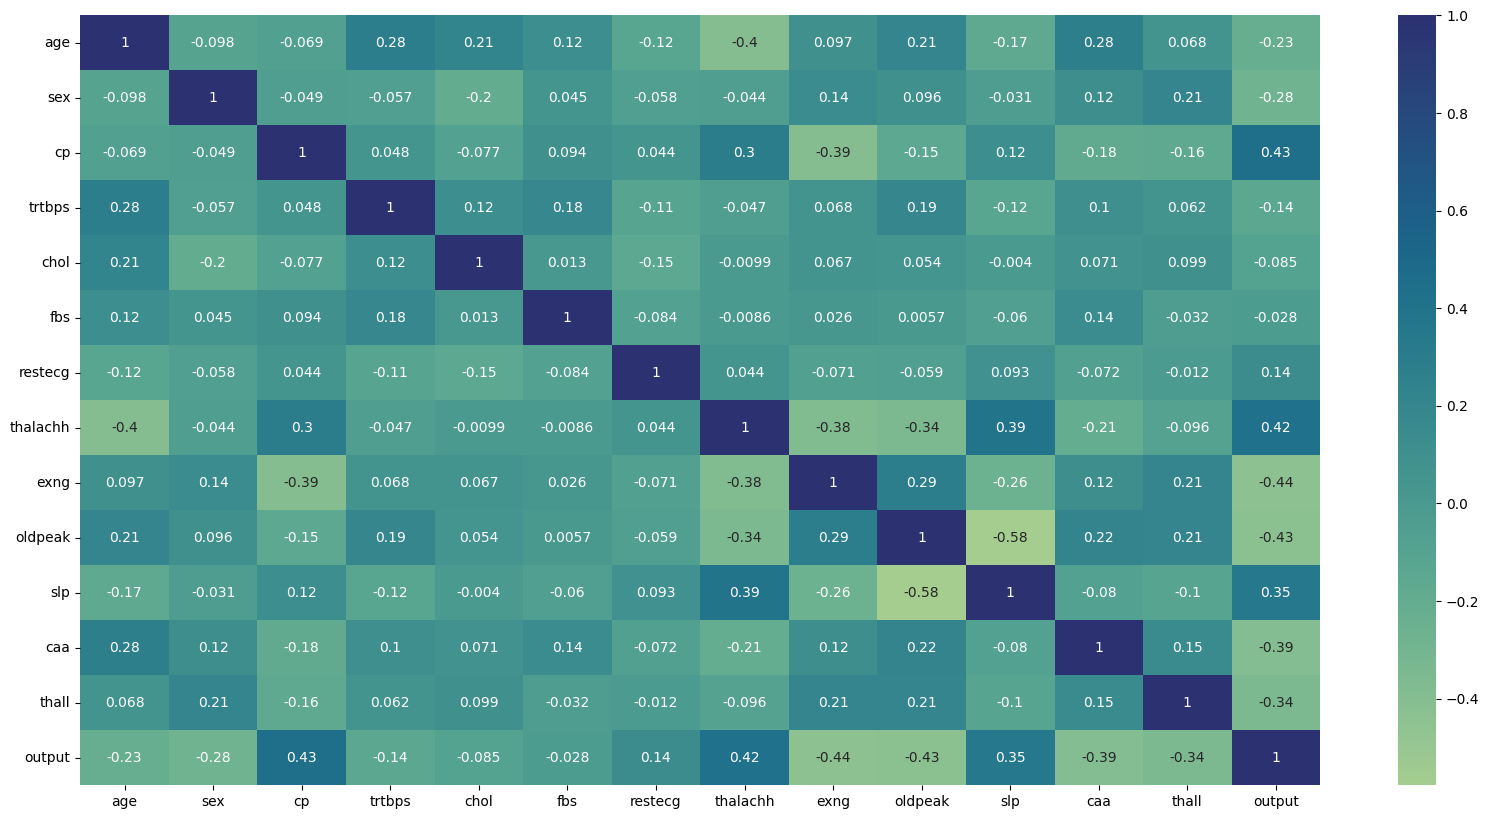

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(heart.corr(), cmap = 'crest', annot = True)
plt.show

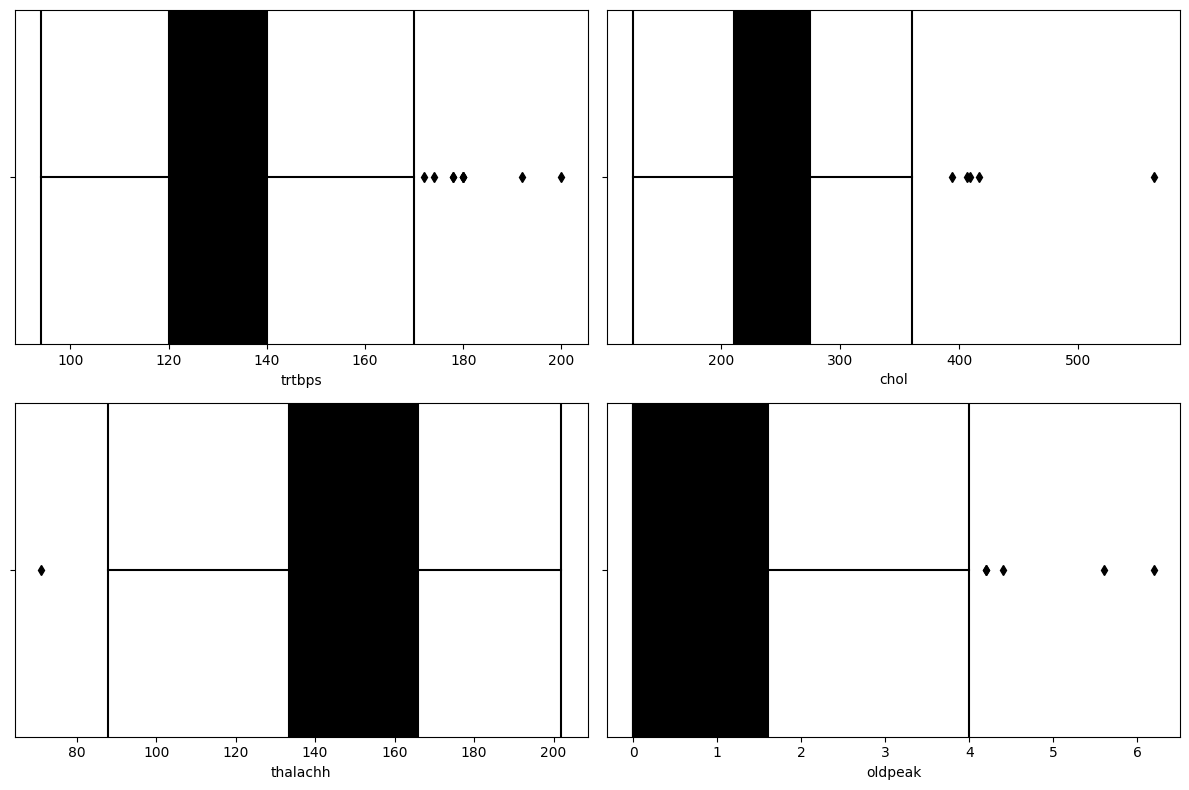

In [13]:
fig, ax1 = plt.subplots(2, 2, figsize=(12, 8))  
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=heart, x=heart[con_cols[1:][k]], saturation=1, ax=ax1[i][j], color="black", width=600)
        k += 1
plt.tight_layout()
plt.show()

In [14]:
fig = px.histogram(data_frame=heart, x='sex', color='sex', width=600, height=400)
fig.show()

In [15]:
fig = px.histogram(heart, x="cp", title="Distribution of Chest Pain Types", barmode="group", color="cp", width=600, height=400)
fig.show()

In [16]:
fig = px.histogram(heart, x="oldpeak", title="Distribution of oldpeak variable", color_discrete_sequence=['grey'], nbins=20, width=600, height=400)
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7)
fig.show()

In [17]:
heart_mean = heart.groupby('age')['output'].mean().reset_index()

fig = px.line(heart_mean, x='age', y='output', title='Effect of Age on Heart Attack', width=600, height=400)
fig.update_layout(xaxis_title='Age', yaxis_title='Output')
fig.show()

In [18]:
fig = px.density_contour(heart, x='cp', y='output', title='Effect of cp on Heart Attack', width=600, height=400)
fig.show()

In [19]:
heart_agg = heart.groupby(['age', 'output']).mean().reset_index()

fig = px.line(heart_agg, x='age', y='trtbps', color='output', title="Effect of Heart Attack with Increase in Age and Blood Pressure", width=600, height=400)
fig.show()

In [20]:
fig = px.scatter(heart, x="exng", y="age", color="output", facet_col="sex", symbol="output",
                 symbol_map={0: "circle", 1: "x"}, 
                 category_orders={"sex": [0, 1], "output": [0, 1]},
                 width=800, height=400)  

fig.show()

#  Importing Modules & Packages

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier


#  Data Preparation

We perform one-hot encoding as it is a crucial preprocessing step in machine learning, ensuring that categorical variables are properly represented numerically while preserving the integrity of the data and allowing the model to learn effectively from the information encoded in these variables.

Scaling & Encoding:

In [22]:
# creating a copy of dataframe
heart_1 = heart

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
heart_1 = pd.get_dummies(heart_1, columns = cat_cols, drop_first = True)

# defining the features and target
X = heart_1.drop(['output'],axis=1)
y = heart_1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


Splitting the dataset:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify = y, random_state= 10)

We need to maintain the proportion of positive (heart attack) and negative (no heart attack) cases in both the training and testing sets ensuring that the model learns from and is evaluated on a representative sample of the data. This promotes more reliable model training and evaluation, ultimately leading to better generalization performance when deployed in real-world scenarios.

Shape of split data:

In [24]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (242, 22) (242, 1)
Shape for testing data (61, 22) (61, 1)


In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

Modeling

# 1. Logistic Regression

In [26]:
# instantiating the object and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# predicting the values
predicted=model.predict(X_test)

#Confusion matrix
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

# printing the test accuracy
print ("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[25  3]
 [ 4 29]]
The test accuracy of Logistic Regression is :  88.52459016393442 %


# 2. Support Vector Mechanism (SVM)

In [27]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
svm_pred = clf.predict(X_test)

#Confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_acc_score = accuracy_score(y_test, svm_pred)
print("confusion matrix")
print(svm_conf_matrix)
print("\n")

# printing the test accuracy
print("The test accuracy of SVM is ", accuracy_score(y_test, svm_pred))

confusion matrix
[[24  4]
 [ 4 29]]


The test accuracy of SVM is  0.8688524590163934


# 3. K-Nearest Neighbour (KNN)

In [28]:
# instantiating the object
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train, y_train)

# calculating the predictions
knn_pred = knn.predict(X_test)

#Confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_acc_score = accuracy_score(y_test, knn_pred)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")

# printing the test accuracy
print(" The test accuracy of K-NeighborsClassifier is:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_pred))

confusion matrix
[[24  4]
 [ 6 27]]


 The test accuracy of K-NeighborsClassifier is: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# 4. Decision Tree (DT)

In [29]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 4)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
dt_pred = dt.predict(X_test)

#Confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_acc_score = accuracy_score(y_test, dt_pred)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, dt_pred))

confusion matrix
[[16 12]
 [ 7 26]]


The test accuracy score of Decision Tree is  0.6885245901639344


We can observe that out of all the four models, Logitstic Regression gave the highest accuracy of 88%. So let's use Hyperparameter tuning to get the maximum accuracy.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Create the logistic regression model
log_reg = LogisticRegression()

# Custom scoring function for accuracy
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring=custom_scorer)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Retrain the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the final model
final_accuracy = best_model.score(X_test, y_test)
print(f"The Final Accuracy is: {final_accuracy:.4f}")
print(f"Best params: ", best_params)

The Final Accuracy is: 0.9016
Best params:  {'C': 10, 'penalty': 'l2'}


# Conclusion
In conclusion, the experimental results indicate that both Logistic Regression and Support Vector Machine (SVM) models demonstrate strong predictive performance in identifying potential heart attack cases, with accuracies of approximately 90% and 86.89% respectively. While K-Nearest Neighbors (KNN) also exhibits respectable accuracy at around 83.61%, Decision Tree falls short with an accuracy of approximately 68.85%.

These findings emphasize the importance of selecting appropriate machine learning algorithms for heart attack prediction, with Logistic Regression and SVM emerging as promising candidates for further evaluation.